In [1]:
from util import *
from generation import *
from swarm import *
from metrics import *
import random
import time
import copy
from IPython import display
import pylab as pl
from multiprocess.pool import ThreadPool
from swarm_types import *


In [2]:
import yal

modules = yal.read('./yal_files/ami33.yal')

# modules = yal.read('./yal_files/ami49.yal')

participants = yal.util.as_participants(modules)

# # For ami49 : Filter out Connection with zero emphasis

# for participant in participants[:-1]:

#     participant['connections'] = {x:y for x,y in participant['connections'].items() if y}

# #participants


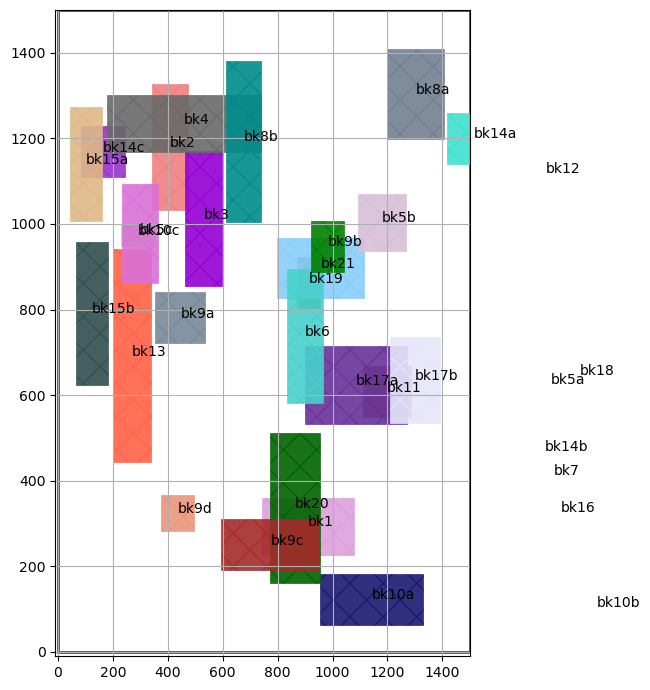

In [3]:
layout_zone = Rectangle(0,0,1500,1500) 

conciliation_quota  = 0.5

critical_amount     = 100

p   = random_place_mcnc(participants, layout_zone, 666)

a   = plot_participants(layout_zone, p, 1500, 1500)


In [4]:
participants            = determine_initial_conditions(p, layout_zone, conciliation_quota, critical_amount)


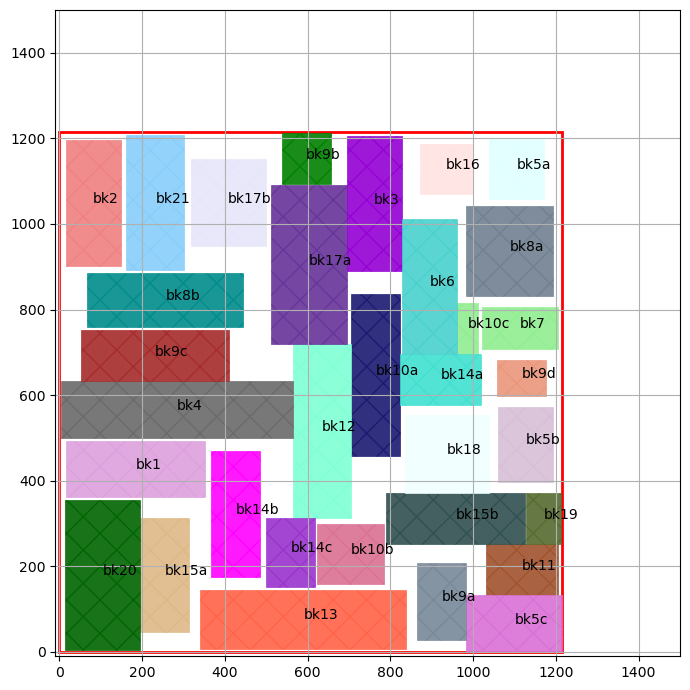

One Round of Interaction took: 0.9486396312713623 seconds


In [5]:
tic = time.time()


tic = time.time()

for i in range(500): # maximum rounds of interaction

    participants, runtime    = one_round_of_interaction(participants, layout_zone, 'interference', conciliation_quota, critical_amount)

    plot_participants(layout_zone, participants, 1500, 1500, plot_connections=False)

    print('One Round of Interaction took: ' + str(runtime) + ' seconds')

    last_moves = [p.last_move for p in participants]

    #print(participants['0']['interference'])
    #print(participants['0']['relaxed-connections'])
    #print(last_moves)

    if last_moves.count('linger')  == len(participants):    

        ds = calculate_dead_space(participants, layout_zone)  

        #print('Current deadspace : ' + str(ds) + ' %') 

        if ds < 25:
            break

        layout_zone         = scale_layout_zone(layout_zone, 0.9) 

        participants        = reset_after_tightening(participants)

    # for i in range(len(participants)):
    #     print(participants[str(i)]['last-move'])

toc = time.time()


In [6]:
print('This took ' + str(toc-tic)  + ' seconds!')

This took 554.6585800647736 seconds!


In [7]:
# from position_export import *

# positions2csv(participants, layout_zone, 'ami33_floorplan.csv')